<a href="https://colab.research.google.com/github/Saloni0512/PyTorch-practice-/blob/main/PyTorch_model_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd

## Neural Network Classification
A classification problem is predicting whether something is one thing or another(there can be multiple things as options)

### 1. Lets make classification data and see it

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,  # X -> features, y -> labels
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"\nFirst 5 samples of X: {X[:5]}")
print(f"\nFirst 5 samples of y: {y[:5]}")


First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Lets create a dataframe
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1],
                       "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


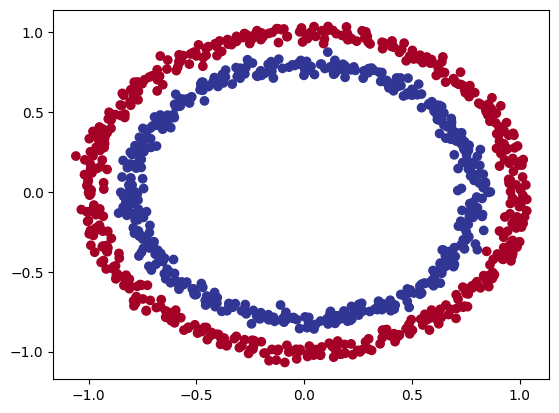

In [ ]:
# Let's visualise some more
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu)

* Note: we are working here with a toy dataset(small but enough to get fundamentals strong)

In [ ]:
circles.size

3000

#### 1.1 Converting data into tensors and create train and test splits

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X) , X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state=42)

In [ ]:
len(X_test), len(X_train), len(y_test), len(y_train)

(200, 800, 200, 800)

### 2. Building a model
For classification of blue and red dots
Main steps:
* Set up device agnostic code so that code runs on GPU
* Create a model by subclassing nn.Module
* Define a loss function and optimiser
* Create a training and test loop



In [ ]:
from torch import nn

# Set device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
from sklearn import datasets

# Construct a model that subclasses nn.Module
class CircleModelV0(torch.nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers that handle the shape of our data
    self.layer_1 = nn.Linear(in_features = 2,out_features = 5) # takes in 2 features and upscales to 5
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features from previous layer and outputs 1 which is the shape of y

    # Define a forward method
    def forward(self,x):
      return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# Create an instance of model and send it to device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Lets replicate the above model using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5828,  0.2314],
                      [ 0.1478, -0.2407],
                      [-0.0450, -0.2594],
                      [ 0.6832, -0.3426],
                      [-0.3828,  0.6536]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.2892,  0.1938, -0.2292, -0.3168, -0.6632], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.4347,  0.3496,  0.1538,  0.1040, -0.2634]], device='cuda:0')),
             ('1.bias', tensor([-0.4084], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"\nFirst 10 predictions: {untrained_preds[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])

First 10 predictions: tensor([[-2.5251e-01],
        [-3.3100e-01],
        [-9.8677e-03],
        [-3.2142e-01],
        [ 4.8698e-02],
        [ 3.3009e-04],
        [-2.6710e-01],
        [-1.8935e-01],
        [-1.2704e-02],
        [-3.3562e-01]], device='cuda:0')


In [ ]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

#### 2.1 Setup loss function and optimiser
For a classification problem we use binary cross entropy or categorical cross entropy

In [ ]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() # has a built-in sigmoid activation function

optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq compares tensors
  acc = (correct/len(y_pred)) * 100
  return acc


### 3. Training model
Training loop steps:
* Forward pass
* Calculate the loss
* Optimizer zero grad
* loss backward
* optimizer step

#### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

The model's outputs are going to be raw **logits**.
We can convert them into **prediction probabilities** by passing them through an activation function e.g. `sigmoid` for binary classification and `softmax` for multi class classification.
The prediction probabilties are then rounded or `argmax()` is used to get the labels.


In [ ]:
# View the first five outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2525],
        [-0.3310],
        [-0.0099],
        [-0.3214],
        [ 0.0487]], device='cuda:0')

In [ ]:
# Use the sigmoid activation function on model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4372],
        [0.4180],
        [0.4975],
        [0.4203],
        [0.5122]], device='cuda:0')

For our prediction probability values, we need to perfoem a range style rounding on them:
* y_pred_probs < 0.5, `y=0` -  class 0
* y_pred_probs >= 0.5, `y=1` -  class 1

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

#### 3.2  Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer 0 grad
  optimizer.zero_grad()

  # Backpropagation
  loss.backward()

  # Gradient descent
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Lets print the results
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test_loss: {test_loss:.5f} | Test_acc: {test_acc:.2f}% ")




Epoch: 0 | Loss: 0.69861 | Acc: 46.75% | Test_loss: 0.69249 | Test_acc: 52.00% 
Epoch: 10 | Loss: 0.69726 | Acc: 47.38% | Test_loss: 0.69148 | Test_acc: 52.50% 
Epoch: 20 | Loss: 0.69648 | Acc: 48.12% | Test_loss: 0.69106 | Test_acc: 53.00% 
Epoch: 30 | Loss: 0.69596 | Acc: 48.75% | Test_loss: 0.69091 | Test_acc: 52.50% 
Epoch: 40 | Loss: 0.69556 | Acc: 48.50% | Test_loss: 0.69089 | Test_acc: 52.50% 
Epoch: 50 | Loss: 0.69525 | Acc: 48.62% | Test_loss: 0.69092 | Test_acc: 53.00% 
Epoch: 60 | Loss: 0.69499 | Acc: 47.75% | Test_loss: 0.69099 | Test_acc: 54.00% 
Epoch: 70 | Loss: 0.69477 | Acc: 48.00% | Test_loss: 0.69107 | Test_acc: 54.50% 
Epoch: 80 | Loss: 0.69458 | Acc: 48.38% | Test_loss: 0.69117 | Test_acc: 54.50% 
Epoch: 90 | Loss: 0.69442 | Acc: 48.25% | Test_loss: 0.69127 | Test_acc: 54.50% 


### 4. Make predictions and then evaluate the model
According to the metrics above it is pretty evident that the model is not learning anything...
So let's do some visualisation

We will import a function `plot_decision_boundary` for this

In [ ]:
import requests
from pathlib import Path

# Download helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)




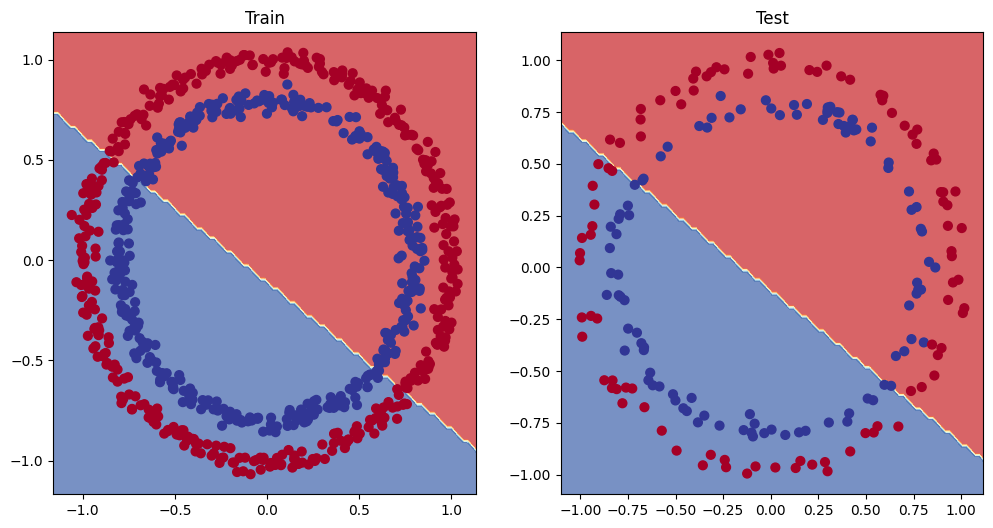

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving our model (from a model perspective)

* Add more layers - give the model more chance to learn
* add more hidden units - go from 5 to 10
* Fit for longer
* Change the activation function
* Change the learning rate
* Change the loss function


All the above options are referred to as **hyperparameters**

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5454,  0.3222],
                      [ 0.1757, -0.1723],
                      [-0.0359, -0.2360],
                      [ 0.6894, -0.3268],
                      [-0.4024,  0.6049]])),
             ('0.bias', tensor([ 0.3207,  0.2179, -0.2202, -0.3108, -0.6808])),
             ('1.weight',
              tensor([[ 0.4649,  0.3361,  0.0856,  0.0715, -0.2172]])),
             ('1.bias', tensor([-0.3384]))])

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_1.train()

  # Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer 0 grad
  optimizer.zero_grad()

  # Backpropagation
  loss.backward()

  # Gradient descent
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Lets print the results
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test_loss: {test_loss:.5f} | Test_acc: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test_loss: 0.69261 | Test_acc: 51.00% 
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test_loss: 0.69379 | Test_acc: 48.00% 
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test_loss: 0.69437 | Test_acc: 46.00% 
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test_loss: 0.69458 | Test_acc: 45.00% 
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test_loss: 0.69465 | Test_acc: 46.00% 
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test_loss: 0.69467 | Test_acc: 46.00% 
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test_loss: 0.69468 | Test_acc: 46.00% 
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test_loss: 0.69468 | Test_acc: 46.00% 
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test_loss: 0.69468 | Test_acc: 46.00% 
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test_loss: 0.69468 | Test_acc: 46.00% 


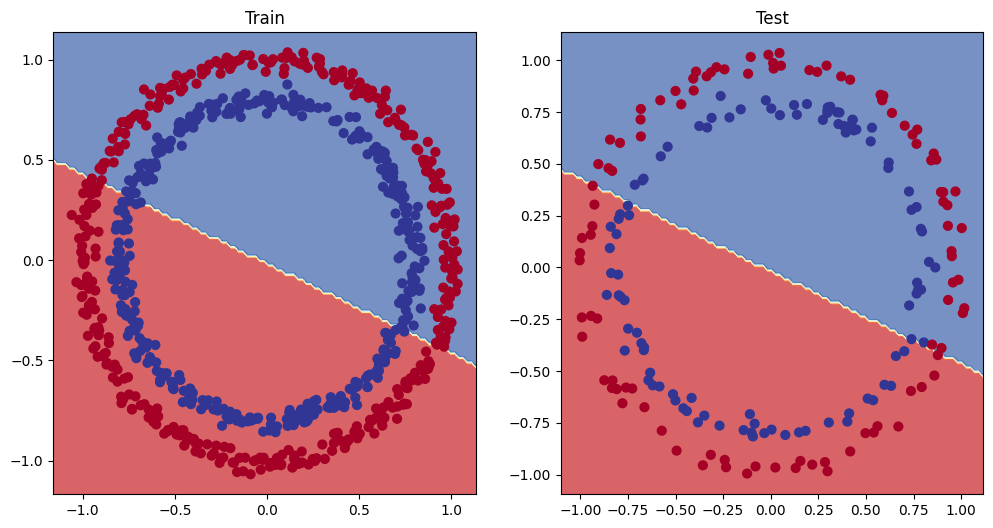

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

The model is still not performing well, so lets see if our model can work on a smaller dataset

#### 5.1

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight* X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8*len(X_regression))
X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split]
X_test_reg, y_test_reg = X_regression[train_split:], y_regression[train_split:]

len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)

(80, 80, 20, 20)

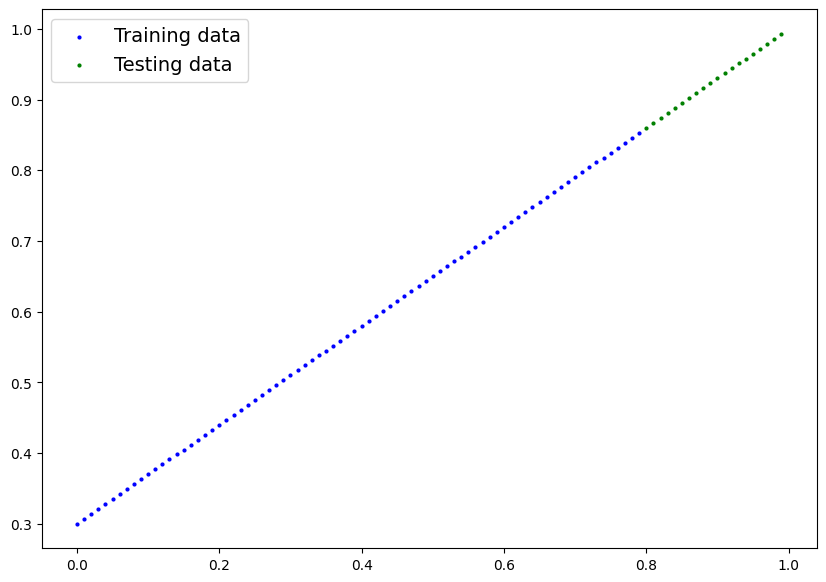

In [ ]:
plot_predictions(train_data = X_train_reg,
                 train_labels = y_train_reg,
                 test_data = X_test_reg,
                 test_labels = y_test_reg,
                 predictions = None
                )

#### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
X_test_reg[:5]

tensor([[0.8000],
        [0.8100],
        [0.8200],
        [0.8300],
        [0.8400]])

In [ ]:
# Same architecture as model_1 but we use nn.Sequential here
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimiser
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the no of epochs
epochs = 1000

# Put data on the target device
X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

# Training loop
for epoch in range(epochs):
  y_pred_reg = model_2(X_train_reg)
  loss = loss_fn(y_pred_reg, y_train_reg)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing loop
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test_loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test_loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test_loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test_loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test_loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test_loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test_loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test_loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test_loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test_loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test_loss: 0.00360


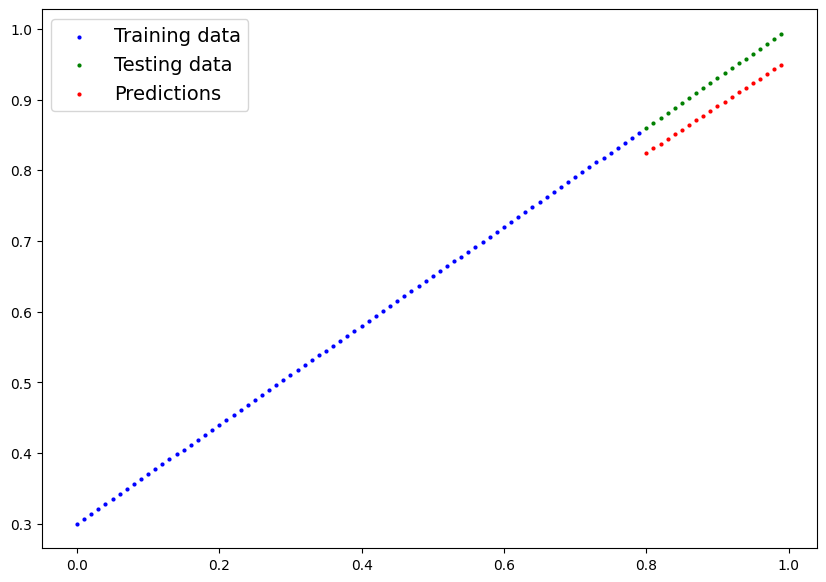

In [ ]:
# Turn on evaluation mode
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_reg)


# Plot data and predictions
plot_predictions(train_data = X_train_reg.cpu(),
                 train_labels =y_train_reg.cpu(),
                 test_data =X_test_reg.cpu(),
                 test_labels =y_test_reg.cpu(),
                 predictions=y_preds.cpu())

### 6. The missing piece of our model: Non-Linearity
What patterns can be drawn when we are given infinite amout of straight and non straight lines

#### 6.1 Recreating non-linear data (red and blue circles)

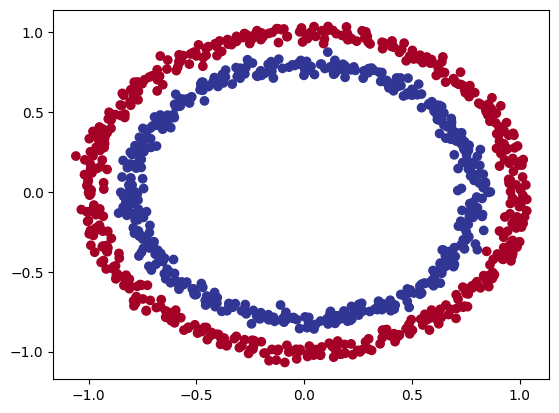

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data into tensors and then do the split
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non straight lines

In [ ]:
# Build a model with non-linear activation function
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation func

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

#### 6.3 Training a model with non-linearity

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Set the no of epochs
epochs = 1000

# Training loop
for epoch in range(epochs):
  model_3.train()
  # Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits -> prediction probabilities -> prediction labels

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing loop
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6929 | Acc: 50.00% | Test_loss: 0.6932 | Test_acc: 50.00%
Epoch: 100 | Loss: 0.6912 | Acc: 52.88% | Test_loss: 0.6910 | Test_acc: 52.50%
Epoch: 200 | Loss: 0.6898 | Acc: 53.37% | Test_loss: 0.6894 | Test_acc: 55.00%
Epoch: 300 | Loss: 0.6879 | Acc: 53.00% | Test_loss: 0.6872 | Test_acc: 56.00%
Epoch: 400 | Loss: 0.6852 | Acc: 52.75% | Test_loss: 0.6841 | Test_acc: 56.50%
Epoch: 500 | Loss: 0.6810 | Acc: 52.75% | Test_loss: 0.6794 | Test_acc: 56.50%
Epoch: 600 | Loss: 0.6751 | Acc: 54.50% | Test_loss: 0.6729 | Test_acc: 56.00%
Epoch: 700 | Loss: 0.6666 | Acc: 58.38% | Test_loss: 0.6632 | Test_acc: 59.00%
Epoch: 800 | Loss: 0.6516 | Acc: 64.00% | Test_loss: 0.6476 | Test_acc: 67.50%
Epoch: 900 | Loss: 0.6236 | Acc: 74.00% | Test_loss: 0.6215 | Test_acc: 79.00%


#### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

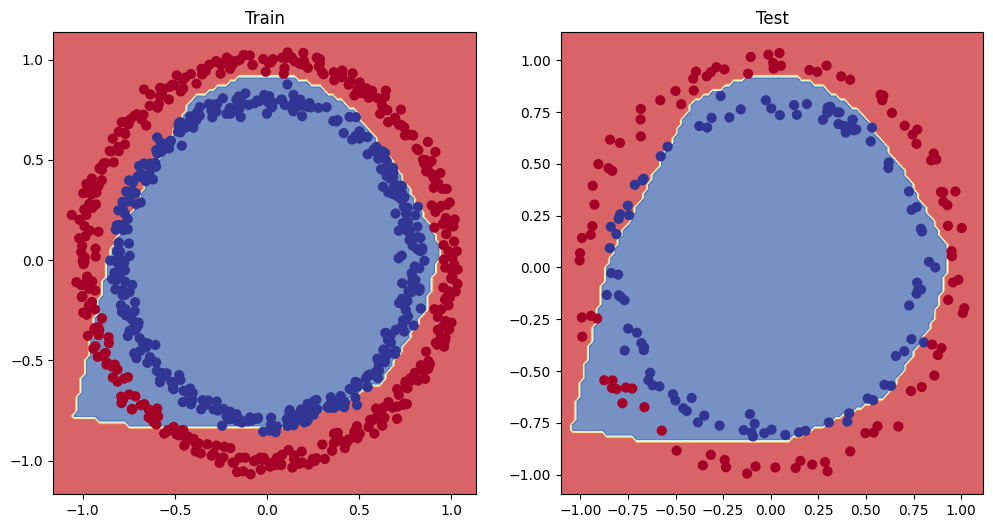

In [ ]:
# plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Now let's do a multiclass classification problem
To classify more than one thing or another

#### 7.1 Creating a toy multi-class dataset

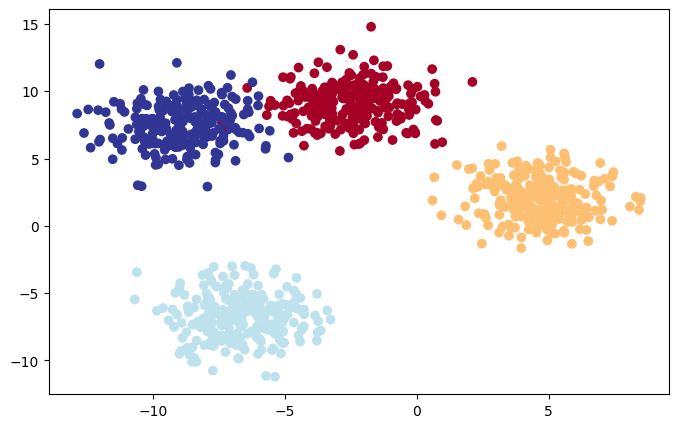

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparams
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# plot data
plt.figure(figsize=(8,5))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

#### 7.2 Building the model for multi-class classification

In [ ]:
# Create the model class
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8): # Initialises the constructor for the model
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of the model
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr=0.1)

#### 7.3 Getting prediction probabilities for a multi-class PyTorch model


In [ ]:
# Let's get raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# Convert model's logit outputs to prediction probabilties
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]], device='cuda:0')


In [ ]:
# Now let's convert prediction probabilties to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[4])

tensor(0, device='cuda:0')

#### 7.4 Create the training loop and the testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put the data on device
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

# Training loop
for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing loop
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # Print out what's happenin
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f}% | Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.1588 | Accuracy: 87.62% | Test_loss: 1.0755 | Test_acc: 48.00%
Epoch: 100 | Loss: 0.0331 | Accuracy: 87.62% | Test_loss: 0.0243 | Test_acc: 99.50%
Epoch: 200 | Loss: 0.0266 | Accuracy: 87.62% | Test_loss: 0.0165 | Test_acc: 99.50%
Epoch: 300 | Loss: 0.0250 | Accuracy: 87.62% | Test_loss: 0.0144 | Test_acc: 99.50%
Epoch: 400 | Loss: 0.0243 | Accuracy: 87.62% | Test_loss: 0.0134 | Test_acc: 99.50%
Epoch: 500 | Loss: 0.0238 | Accuracy: 87.62% | Test_loss: 0.0127 | Test_acc: 99.50%
Epoch: 600 | Loss: 0.0234 | Accuracy: 87.62% | Test_loss: 0.0122 | Test_acc: 99.50%
Epoch: 700 | Loss: 0.0231 | Accuracy: 87.62% | Test_loss: 0.0118 | Test_acc: 99.50%
Epoch: 800 | Loss: 0.0228 | Accuracy: 87.62% | Test_loss: 0.0115 | Test_acc: 99.50%
Epoch: 900 | Loss: 0.0225 | Accuracy: 87.62% | Test_loss: 0.0112 | Test_acc: 99.50%


#### 7.5 Making and evaluating predictions


In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[ -2.3751,  10.9387, -10.2038, -11.3271],
        [ -2.1934,  -9.4839,  -6.3062,   5.2289],
        [ -4.9855,  -5.3790,   5.3840,  -4.3115],
        [ -3.0428,   8.1532,  -5.4971,  -6.6867],
        [  6.4903,  -2.8976, -12.3324,  -8.4675],
        [ -2.7724, -11.1928,  -7.4741,   6.3900],
        [ -4.3608,  -4.5814,   4.6890,  -3.5910],
        [  5.8017,  -6.8308,  -9.7351,  -4.1265],
        [ -6.3789,  -6.9228,   6.6638,  -5.5251],
        [  6.2822,  -5.5357, -10.3558,  -5.4748]], device='cuda:0')

In [ ]:
# Convert model's logit outputs to prediction probabilties
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])

tensor([[1.6516e-06, 1.0000e+00, 6.5756e-10, 2.1386e-10],
        [5.9742e-04, 4.0743e-07, 9.7751e-06, 9.9939e-01],
        [3.1372e-05, 2.1166e-05, 9.9989e-01, 6.1553e-05],
        [1.3729e-05, 9.9998e-01, 1.1797e-06, 3.5901e-07],
        [9.9992e-01, 8.3727e-05, 6.6890e-09, 3.1907e-07],
        [1.0490e-04, 2.3113e-08, 9.5250e-07, 9.9989e-01],
        [1.1735e-04, 9.4122e-05, 9.9954e-01, 2.5340e-04],
        [9.9995e-01, 3.2640e-06, 1.7882e-07, 4.8777e-05],
        [2.1657e-06, 1.2571e-06, 9.9999e-01, 5.0864e-06],
        [9.9998e-01, 7.3711e-06, 5.9456e-08, 7.8340e-06]], device='cuda:0')


In [ ]:
# Now let's convert prediction probabilties to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

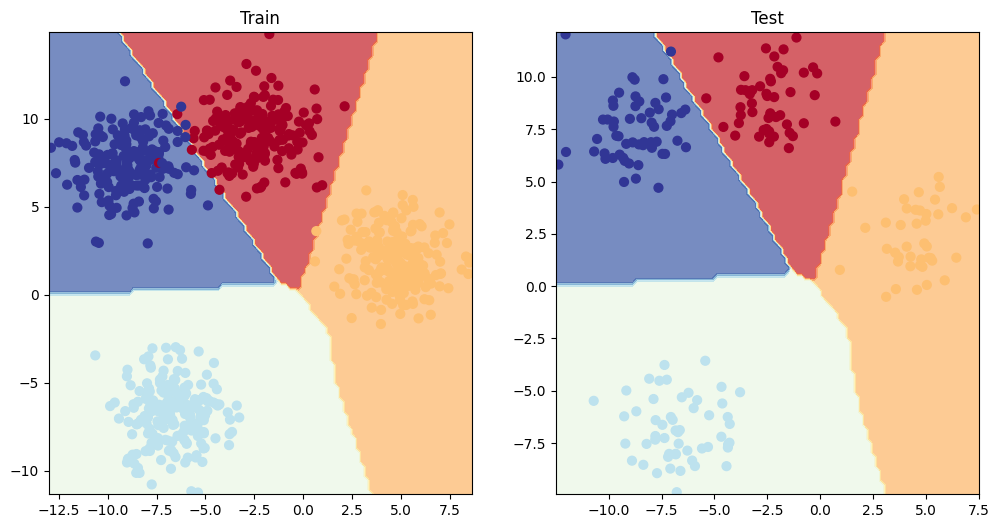

In [ ]:
# plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 8. A few more classification metrics (To evaluate our classification model...)
* Accuracy - useful when we have balanced classes
* Precision
* Recall
* F1-score - combines PR
* Confusion Matrix
* Classification Report

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device) # make sure to use to(device) to avoid device type errors

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')